In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
df1 = pd.read_csv('deliveries.csv')
df2 = pd.read_csv('matches.csv')

In [10]:
df1.shape

(179078, 21)

In [16]:
df2.shape

(756, 18)

In [17]:
df2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [242]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=3)
x = df2[['team1', 'team2']]
y = df2['toss_winner']
x = pd.get_dummies(x, ['team1', 'team2'], drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
ac = accuracy_score(y_pred, y_test)
ac

0.5394736842105263

## Conclusion
The prediction of toss winner should give a near 50% accuracy proving that the toss results are truly random in a cricket match 

In [259]:
model = RandomForestClassifier()
x = df2[["team1","team2", "toss_winner", "toss_decision", "result"]]
y = df2['winner']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
ac = accuracy_score(y_pred, y_test)
ac

0.5263157894736842

In [247]:
x

,team1_Deccan Chargers,team1_Delhi Capitals,team1_Delhi Daredevils,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,team1_Rajasthan Royals,...,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_normal,result_tie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
754,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


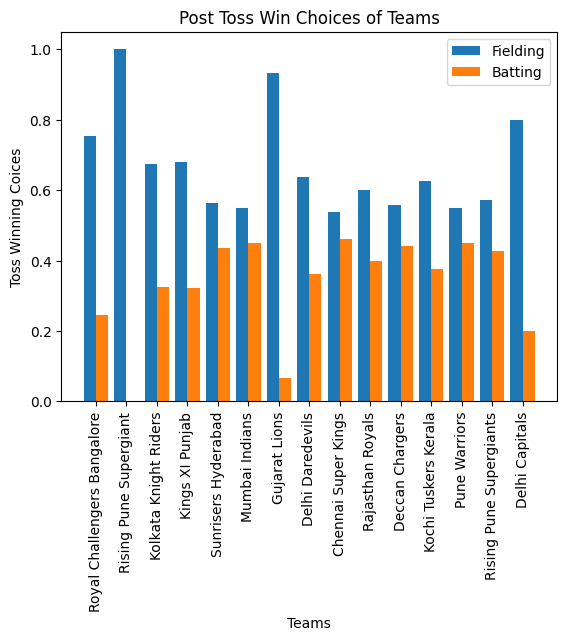

In [236]:
teams = df2['toss_winner'].unique()
field_probability = []
bat_probability = []
for team in teams:
    teamdf = df2[df2['toss_winner']==team]
    values = teamdf['toss_decision'].value_counts().values
    fieldprob = values[0]/(np.sum(values))
    batprob = 1 - fieldprob
    field_probability = np.append(field_probability, fieldprob)
    bat_probability = np.append(bat_probability, batprob)

X_axis = np.arange(len(teams))
plt.bar(X_axis - 0.2, field_probability, 0.4, label = 'Fielding')
plt.bar(X_axis + 0.2, bat_probability, 0.4, label = 'Batting')
plt.xticks(X_axis, teams, rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Toss Winning Coices")
plt.title("Post Toss Win Choices of Teams")
plt.legend()
plt.show()

In [239]:
len(df2['city'].unique())

33